# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Load Data

In [2]:
reviews_df = pd.read_csv("user_reviews.csv")
apps_df = pd.read_csv("apps.csv")

# Data Preprocessing for Reviews

In [3]:

reviews_df.dropna(subset=['Translated_Review', 'Sentiment'], inplace=True)
reviews_df = reviews_df[['Translated_Review', 'Sentiment']]

# EDA

In [4]:

print("User Reviews Dataset Overview:")
print(reviews_df.info())

User Reviews Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 37427 entries, 0 to 64230
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Translated_Review  37427 non-null  object
 1   Sentiment          37427 non-null  object
dtypes: object(2)
memory usage: 877.2+ KB
None


In [5]:
print("\nSentiment Distribution:")
print(reviews_df['Sentiment'].value_counts())


Sentiment Distribution:
Sentiment
Positive    23998
Negative     8271
Neutral      5158
Name: count, dtype: int64


In [6]:
# Basic EDA for apps.csv
print("\nApps Dataset Overview:")
print(apps_df.info())


Apps Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.0+ MB
None


In [7]:
print("\nTop Categories by App Count:")
print(apps_df['Category'].value_counts().head())


Top Categories by App Count:
Category
FAMILY      1832
GAME         959
TOOLS        827
BUSINESS     420
MEDICAL      395
Name: count, dtype: int64


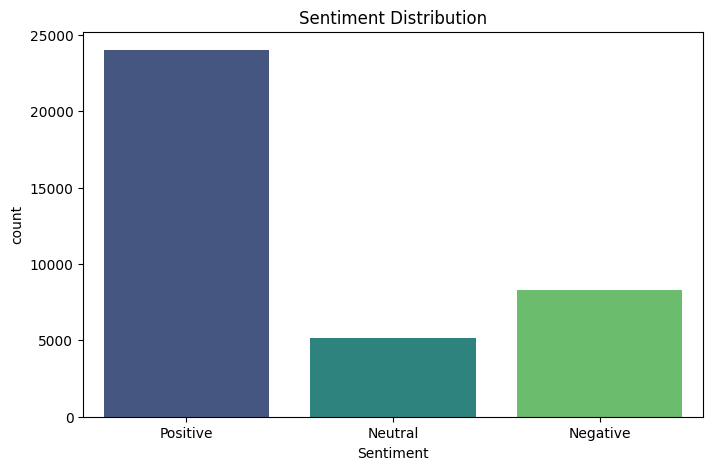

In [8]:
# Visualizations
# 1. Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=reviews_df, x='Sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.show()


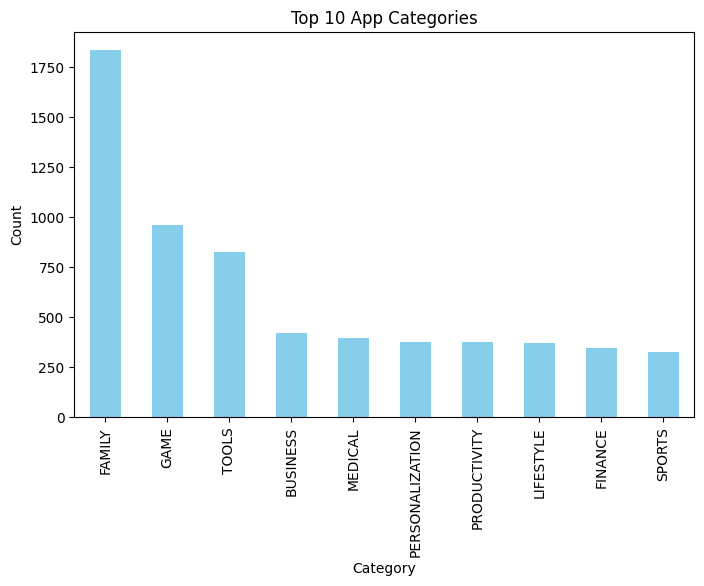

In [9]:
# 2. Top 10 App Categories
plt.figure(figsize=(8, 5))
apps_df['Category'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 App Categories')
plt.ylabel('Count')
plt.xlabel('Category')
plt.show()


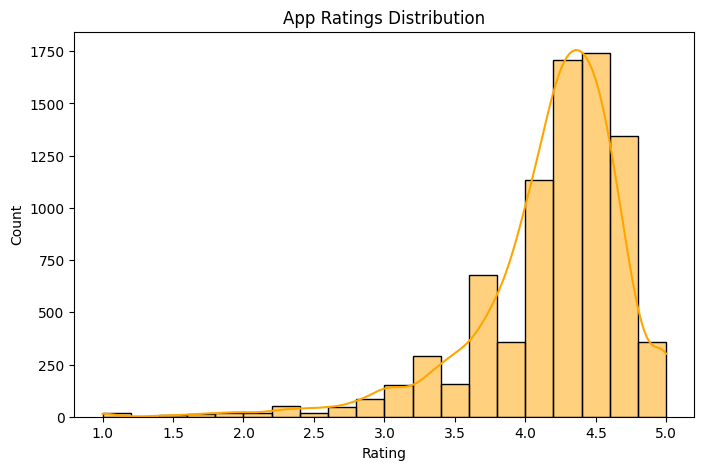

In [10]:
# 3. App Ratings Distribution
plt.figure(figsize=(8, 5))
sns.histplot(apps_df['Rating'], kde=True, bins=20, color='orange')
plt.title('App Ratings Distribution')
plt.xlabel('Rating')
plt.show()

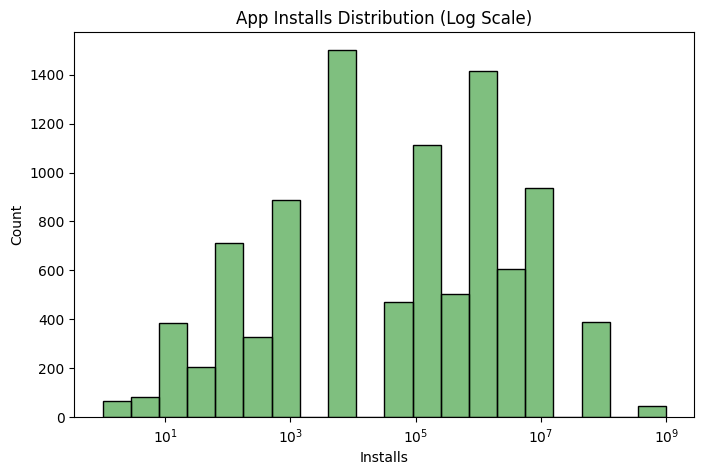

In [11]:
# 4. App Installs Distribution (log scale for better visualization)
plt.figure(figsize=(8, 5))
apps_df['Installs'] = apps_df['Installs'].str.replace('[+,]', '', regex=True).astype(int)
sns.histplot(apps_df['Installs'], kde=True, bins=20, color='green', log_scale=True)
plt.title('App Installs Distribution (Log Scale)')
plt.xlabel('Installs')
plt.show()

In [12]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Text Preprocessing

In [13]:
# Text Preprocessing Function
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return " ".join(tokens)

# Data Preprocessing for Reviews
# Removing NaN values in the Sentiment column
reviews_df.dropna(subset=['Translated_Review', 'Sentiment'], inplace=True)

# Ensure the Sentiment column contains no NaN values
reviews_df = reviews_df[reviews_df['Sentiment'].notna()]

# Encode Sentiments (Mapping Positive to 1, Negative to 0, and filtering only these two classes)
reviews_df = reviews_df[reviews_df['Sentiment'].isin(['Positive', 'Negative'])]
reviews_df['Sentiment_Encoded'] = reviews_df['Sentiment'].map({'Positive': 1, 'Negative': 0})

# Process the reviews
reviews_df['Processed_Review'] = reviews_df['Translated_Review'].apply(preprocess_text)


# Train-Test Split

In [14]:
# Split Data
X = reviews_df['Processed_Review']
y = reviews_df['Sentiment_Encoded']

# Convert Text to Features using TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Random Forest Model

In [15]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
rf_y_pred = rf_classifier.predict(X_test)

print("Confusion Matrix:")
rf_cm = confusion_matrix(y_test, rf_y_pred)
print(rf_cm)

Confusion Matrix:
[[1321  370]
 [ 123 4640]]


In [17]:
print("\nClassification Report:")
print(classification_report(y_test, rf_y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, rf_y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1691
           1       0.93      0.97      0.95      4763

    accuracy                           0.92      6454
   macro avg       0.92      0.88      0.90      6454
weighted avg       0.92      0.92      0.92      6454


Accuracy Score: 0.9236132630926557


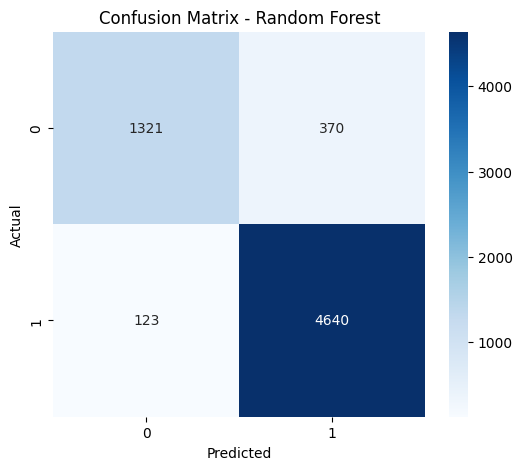

In [18]:
# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Logistic Regression Classifier

In [19]:

lr_classifier = LogisticRegression(max_iter=200, random_state=42)
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [20]:
lr_y_pred = lr_classifier.predict(X_test)

print("Confusion Matrix:")
lr_cm = confusion_matrix(y_test, lr_y_pred)
print(lr_cm)

Confusion Matrix:
[[1277  414]
 [ 109 4654]]


In [21]:
print("\nClassification Report:")
print(classification_report(y_test, lr_y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, lr_y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1691
           1       0.92      0.98      0.95      4763

    accuracy                           0.92      6454
   macro avg       0.92      0.87      0.89      6454
weighted avg       0.92      0.92      0.92      6454


Accuracy Score: 0.9189649829563061


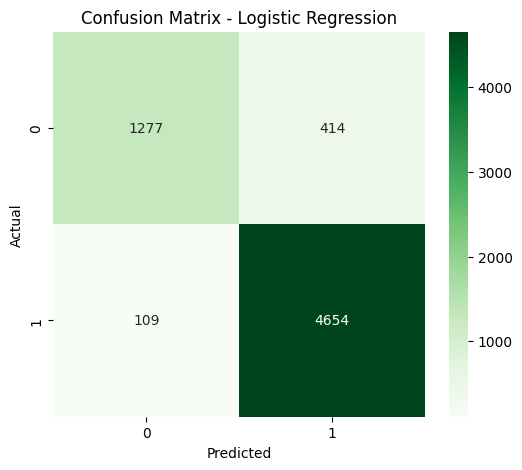

In [22]:
# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Logistic Regression")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Support Vector Classifier (SVC)

In [23]:

print("\nSupport Vector Classifier")
svc_classifier = SVC(kernel="linear", random_state=42)
svc_classifier.fit(X_train, y_train)


Support Vector Classifier


SVC(kernel='linear', random_state=42)

In [24]:
svc_y_pred = svc_classifier.predict(X_test)

print("Confusion Matrix:")
svc_cm = confusion_matrix(y_test, svc_y_pred)
print(svc_cm)


Confusion Matrix:
[[1398  293]
 [ 155 4608]]


In [25]:
print("\nClassification Report:")
print(classification_report(y_test, svc_y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, svc_y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1691
           1       0.94      0.97      0.95      4763

    accuracy                           0.93      6454
   macro avg       0.92      0.90      0.91      6454
weighted avg       0.93      0.93      0.93      6454


Accuracy Score: 0.93058568329718


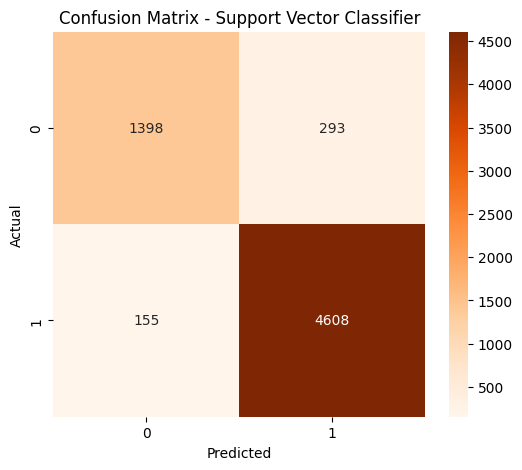

In [26]:
# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(svc_cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - Support Vector Classifier")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Summarization using Grouped Analysis

In [27]:

summary = reviews_df.groupby('Sentiment')['Translated_Review'].apply(lambda x: ' '.join(x))
print("\nSummarized Reviews:")
print(summary)


Summarized Reviews:
Sentiment
Negative    No recipe book Unable recipe book. Waste time ...
Positive    I like eat delicious food. That's I'm cooking ...
Name: Translated_Review, dtype: object


# Comparison of Model Accuracies

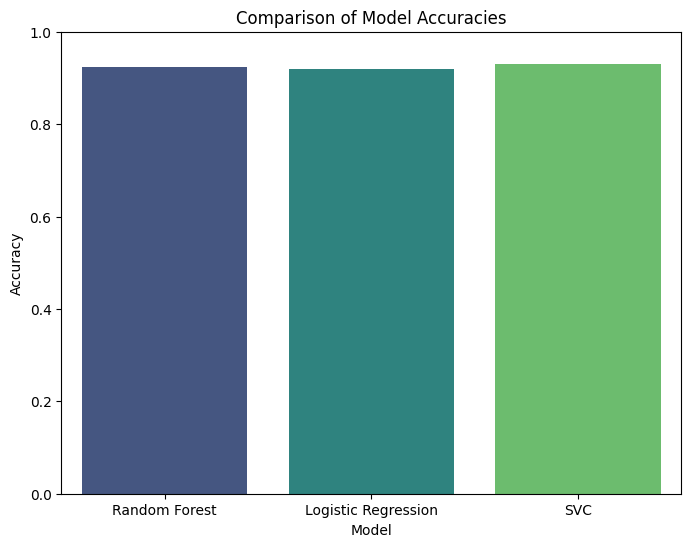

In [28]:
# Accuracy Scores of Models
rf_accuracy = accuracy_score(y_test, rf_y_pred)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
svc_accuracy = accuracy_score(y_test, svc_y_pred)

# Bar Plot for Model Accuracies
model_names = ["Random Forest", "Logistic Regression", "SVC"]
accuracies = [rf_accuracy, lr_accuracy, svc_accuracy]

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Comparison of Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# sentiment for user input text

In [29]:
# Function to predict sentiment for user input text
def predict_sentiment(input_text, model):
    # Preprocess the input text
    processed_text = preprocess_text(input_text)
    # Convert to TF-IDF features
    text_tfidf = tfidf.transform([processed_text])
    # Predict sentiment
    prediction = model.predict(text_tfidf)
    # Map prediction back to sentiment label
    sentiment_label = "Positive" if prediction[0] == 1 else "Negative"
    return sentiment_label

# User input section
while True:
    print("\nSentiment Prediction:")
    user_input = input("Enter a review (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        print("Exiting Sentiment Prediction.")
        break

    # Display predictions for all three models
    rf_sentiment = predict_sentiment(user_input, rf_classifier)
    lr_sentiment = predict_sentiment(user_input, lr_classifier)
    svc_sentiment = predict_sentiment(user_input, svc_classifier)

    print(f"\nPredicted Sentiment:")
    print(f"Random Forest Classifier: {rf_sentiment}")
    print(f"Logistic Regression: {lr_sentiment}")
    print(f"Support Vector Classifier: {svc_sentiment}")



Sentiment Prediction:
Enter a review (or type 'exit' to quit): i love this app

Predicted Sentiment:
Random Forest Classifier: Positive
Logistic Regression: Positive
Support Vector Classifier: Positive

Sentiment Prediction:
Enter a review (or type 'exit' to quit): i hate this app 

Predicted Sentiment:
Random Forest Classifier: Negative
Logistic Regression: Negative
Support Vector Classifier: Negative

Sentiment Prediction:
Enter a review (or type 'exit' to quit): exit
Exiting Sentiment Prediction.
